#### Pandas/Numpy basics with Titanic passengers -dataset
### 
18.1.2018

some material from: 
[Data School video](https://www.youtube.com/watch?v=P_q0tkYqvSk)

---

## Examples with Titanic passengers

---


In [2]:
import pandas as pd
import numpy as np

In [3]:
# load dataframe of passengers
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head() # list 5 first rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# set female to 0, male to 1 with "map" series method to new 'malefemale'
train['malefemale'] = train.Sex.map({'female':0, 'male':1})

In [5]:
# loc = label-location based indexer for selection by label
# select rows 0-4, columns 2
train.loc[0:4, ['Sex', 'malefemale']]

,Sex,malefemale
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [6]:
# select row 0, all columns
train.loc[0, :] 

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
malefemale                           1
Name: 0, dtype: object

In [7]:
# select rows 1,2,3 / all columns = :
train.loc[[1, 2, 3], :]  # or 1:3 (1 through 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0


In [8]:
# leave out columns with .drop
train.head(3).drop(['PassengerId','Pclass'], axis=1)

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [9]:
# drop multiple columns
train.head(3).drop(train.columns[[0, 1, 2, 3, 4, 6, 7, 11, 12]], axis=1)

,Age,Ticket,Fare,Cabin
0,22.0,A/5 21171,7.2500,NaN
1,38.0,PC 17599,71.2833,C85
2,26.0,STON/O2. 3101282,7.9250,NaN


In [10]:
# "apply" = series and dataframe method. Applies a function to each
# element. Count name length to new column
train['Name_length'] = train.Name.apply(len)

In [11]:
# rows 0-4, name & name_length columns
train.loc[0:4, ['Name','Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [12]:
# round up with numpy "ceil"
train['Fare_ceil'] = train.Fare.apply(np.ceil) 

In [13]:
# show only columns fare & fare_ceil
train.loc[0:4, ['Fare','Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [14]:
# Split surname/first name from this list of two elements separated by ,
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [15]:
# function
def get_element(my_list, position):
    return my_list[position]

In [16]:
# take series, apply function (with keyword '0')
train.Name.str.split(',').apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [17]:
# the same with lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [18]:
# show columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'malefemale',
       'Name_length', 'Fare_ceil'],
      dtype='object')

In [19]:
# loc example, rows 0, 1 and 2 included, all columns
train.loc[0:2, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale,Name_length,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,8.0


In [20]:
# iloc example, 2 not included (exclusive of the end)
train.iloc[0:2, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale,Name_length,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0


In [21]:
# show selected columns only
train[['Name','Fare']].head(3)

,Name,Fare
0,"Braund, Mr. Owen Harris",7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833
2,"Heikkinen, Miss. Laina",7.9250


In [22]:
# better way to select columns with loc
train.loc[:, ['Name', 'Fare']].head(3)

,Name,Fare
0,"Braund, Mr. Owen Harris",7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833
2,"Heikkinen, Miss. Laina",7.9250


---
## Data arranging & graphs
```python

```



In [23]:
import matplotlib.pyplot as plt

In [24]:
#train = pd.read_csv('http://bit.ly/kaggletrain', index_col='Age')
train = pd.read_csv('http://bit.ly/kaggletrain')

In [25]:
# data missing?
train.isnull().values.any()

True

In [26]:
# replace NaN values with '0', NaN = no value
#
# If you want to modify existing DataFrame, 
# use the inplace parameter.
#
train['Age'].fillna(0, inplace=True)

In [27]:
# change data type of a column to 'int'
train[['Survived']] = train[['Survived']].astype('int')

In [28]:
# replace female to 0, male to 1 with "map" series method
train['malefemale'] = train.Sex.map({'female':0, 'male':1})

In [29]:
# make 'Age' index
train.set_index(['Age'], inplace = True)

In [30]:
# sort by index (age)
train.sort_index(inplace=True)

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale
Age,,,,,,,,,,,,
0.0,668,0,3,"Rommetvedt, Mr. Knud Paust",male,0,0,312993,7.7750,NaN,S,1
0.0,129,1,3,"Peter, Miss. Anna",female,1,1,2668,22.3583,F E69,C,0
0.0,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,0,2,2668,22.3583,NaN,C,0
0.0,285,0,1,"Smith, Mr. Richard William",male,0,0,113056,26.0000,A19,S,1
0.0,539,0,3,"Risien, Mr. Samuel Beard",male,0,0,364498,14.5000,NaN,S,1
0.0,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0,0,239853,0.0000,NaN,S,1
0.0,275,1,3,"Healy, Miss. Hanora ""Nora""",female,0,0,370375,7.7500,NaN,Q,0
0.0,741,1,1,"Hawksford, Mr. Walter James",male,0,0,16988,30.0000,D45,S,1
0.0,740,0,3,"Nankoff, Mr. Minko",male,0,0,349218,7.8958,NaN,S,1


In [32]:
# '% matplotlib inline' = is static chart
# '% matplotlib notebook' = interactive chart
% matplotlib inline

In [33]:
# count number of PASSENGERS in ticket class 1 - 3
pas = [1,2,3]
for i in range(0,3):
    pas[i] = train['PassengerId'].loc[train['Pclass'] == i+1].count()

print (pas)
print(sum(pas))

[216, 184, 491]
891


In [34]:
# count number of SURVIVORS in ticket class 1 - 3
surv = [1,2,3]
for i in range(0,3):
    surv[i] = train['PassengerId'].loc[(train["Survived"] > 0) & (train["Pclass"] == i+1)].count()

print (surv)
print (sum(surv))

[136, 87, 119]
342


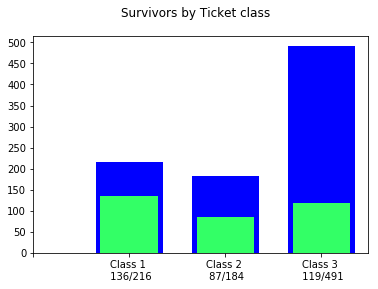

In [35]:
# add title
fig = plt.figure()
fig.suptitle('Survivors by Ticket class', fontsize=12)

# Ticket classes
classes = [1,2,3]

# draw 
plt.bar(classes, pas, width=0.7, color='blue', ecolor='black')  # all passengers
plt.bar(classes, surv, width=0.6, color='#33FF66')  # survivors   # lw=3.5(scatter)

# labels
labels = ['', 'Class 1 \n %.0f/%.0f' % (surv[0],pas[0]), 'Class 2 \n %.0f/%.0f' 
          % (surv[1],pas[1]), 'Class 3 \n %.0f/%.0f' % (surv[2],pas[2])]

# Get or set the x-limits of the current tick, add labels, rotation with keywords or degrees
plt.xticks(range(0,4,1), labels) # x, labels, rotation='horizontal') 

# y-settings, range 0-100, step 10
plt.yticks(range(0,510,50))

# show figure
plt.show()

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale
Age,,,,,,,,,,,,
0.0,668,0,3,"Rommetvedt, Mr. Knud Paust",male,0,0,312993,7.7750,NaN,S,1
0.0,129,1,3,"Peter, Miss. Anna",female,1,1,2668,22.3583,F E69,C,0
0.0,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,0,2,2668,22.3583,NaN,C,0
0.0,285,0,1,"Smith, Mr. Richard William",male,0,0,113056,26.0000,A19,S,1
0.0,539,0,3,"Risien, Mr. Samuel Beard",male,0,0,364498,14.5000,NaN,S,1


In [37]:
# A new dataframe of men, with only 'age' and 'survived'
train2 = train.loc[train['Sex'] == 'male'].copy()
survived_men = train2.loc[:, ['Survived']]

In [38]:
# A new dataframe of women, with only 'age' and 'survived'
train3 = train.loc[train['Sex'] == 'female'].copy()
survived_women = train3.loc[:, ['Survived']]

In [39]:
survived_men.describe()

,Survived
count,577.000000
mean,0.188908
std,0.391775
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [40]:
survived_women.describe()

,Survived
count,314.000000
mean,0.742038
std,0.438211
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [41]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,malefemale
Age,,,,,,,,,,,,
0.0,668,0,3,"Rommetvedt, Mr. Knud Paust",male,0,0,312993,7.7750,NaN,S,1
0.0,129,1,3,"Peter, Miss. Anna",female,1,1,2668,22.3583,F E69,C,0
0.0,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,0,2,2668,22.3583,NaN,C,0
0.0,285,0,1,"Smith, Mr. Richard William",male,0,0,113056,26.0000,A19,S,1
0.0,539,0,3,"Risien, Mr. Samuel Beard",male,0,0,364498,14.5000,NaN,S,1
0.0,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0,0,239853,0.0000,NaN,S,1
0.0,275,1,3,"Healy, Miss. Hanora ""Nora""",female,0,0,370375,7.7500,NaN,Q,0
0.0,741,1,1,"Hawksford, Mr. Walter James",male,0,0,16988,30.0000,D45,S,1
0.0,740,0,3,"Nankoff, Mr. Minko",male,0,0,349218,7.8958,NaN,S,1


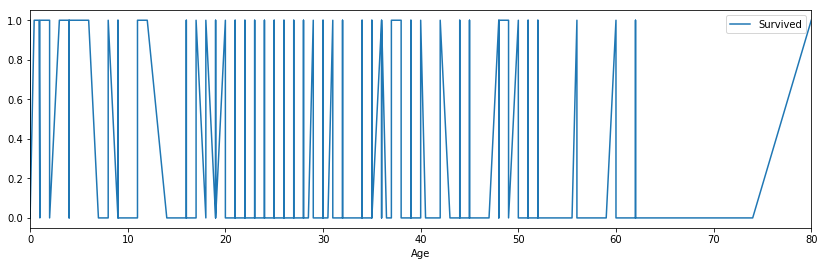

In [42]:
# plot figure
my_plot = survived_men.plot(figsize=(14, 4))

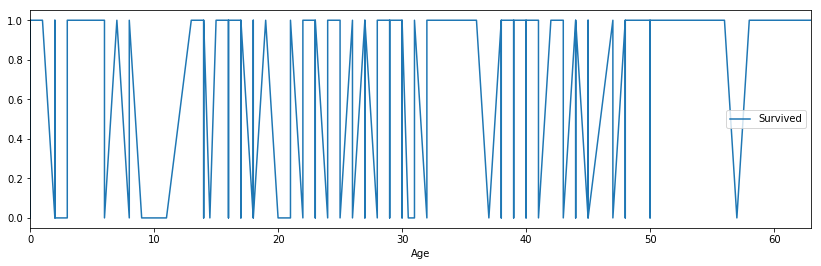

In [43]:
# plot figure
my_plot2 = survived_women.plot(figsize=(14, 4))

In [44]:
# load dataframe of passengers
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head() # list 5 first rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


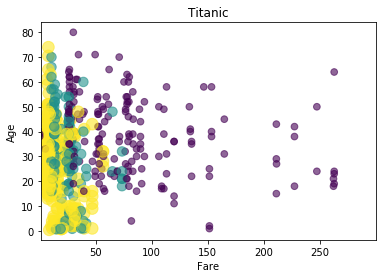

In [47]:
# scatterplot, plot size/class and color/class

fig, ax = plt.subplots()
plt.scatter(train.Fare, train.Age, alpha=0.6, s = train.Pclass*45, c = train.Pclass)
ax.xaxis.set_ticks(np.arange(0,300,50))
#plt.xticks([1, 200, 400],['1', '200', '400'])

#customizations
#plt.xscale('log') # this is not logarithmic
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Titanic')

plt.xlim(1,300)

# Display the plot
plt.show()